## Deep Learning for Computer Vision:  Assignment 3


## Computer Science: COMS W 4995 006


### Due: March 6, 2018

#### Problem

You are given two dimensional input from three separate classes. Your task is to implement a multi-layer perceptron (MLP) 3-class classifier with multiple hidden layers and a regularization on the weights. For the activiation function of the hidden units use ReLU or leaky ReLU. For the predictions use softmax on a linear output layer as we did in class. Your loss layer should compute $-\log P(y = i \,|{\bf x})$ where $i$ is the correct label according to the training data.

a) Implement each layer type (hidden, output, and loss) as separate python classes, each with methods for initialization, forward propagation, and backpropagation.

b) Implement a MLP as its own class, with separate methods for initialization, adding a layer, forward propagation, backpropagation, training and prediction. 

c) Let the layer dimensions be parameters passed when the network is created.

d) Let the number of training epochs, the mini-batch size, and the regularization parameter be parameters that are passed when training the network.

e) Build and run your network using your own constructs. The code for doing this might look like:

NN = MLP()
NN.add_layer('Hidden', dim_in=2, dim_out=16)
NN.add_layer('Hidden', dim_in=16, dim_out=16)
NN.add_layer('Hidden', dim_in=16, dim_out=16)
NN.add_layer('Output', dim_in=16, dim_out=3)
NN.add_layer('Loss', dim_in=3, dim_out=3)

loss = NN.train(X, y, epochs=100, bsize=8, alpha=0.0)
plot_loss(loss)
plot_decision_regions(NN)

f) Show the decision regions of the trained classifier by densely generating points in the plane and color coding these points with the three different labels. 

g) Repeat varying the number of hidden units (3, 8, 16), the number of hidden layers (1 and 3), and the regularization value (0 and some other value of your choosing).

h) Now replace your ReLU activation function with a softplus function and repeat.

Grading: a-g=90%, h=10%. 

#### NOTE:  Do not to use keras, tensorflow, pytorch, sklearn, etc. to do this.  You must build the machine learning components from scratch.  

#### YOUR CODE MUST BE YOUR OWN.
_______________________________________________________________



Let's start by importing some libraries.

In [227]:
import numpy as np
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
from decimal import Decimal
%matplotlib inline

Let's make up our 2D data for our three classes.

In [5]:
data = pd.DataFrame(np.zeros((5000, 3)), columns=['x1', 'x2', 'y'])

# Let's make up some noisy XOR data to use to build our binary classifier
for i in range(len(data.index)):
    x1 = random.randint(0,1)
    x2 = random.randint(0,1)
    if x1 == 1 and x2 == 0:
        y = 0
    elif x1 == 0 and x2 == 1:
        y = 0
    elif x1 == 0 and x2 == 0:
        y = 1
    else:
        y = 2
    x1 = 1.0 * x1 + 0.20 * np.random.normal()
    x2 = 1.0 * x2 + 0.20 * np.random.normal()
    data.iloc[i,0] = x1
    data.iloc[i,1] = x2
    data.iloc[i,2] = y
    
for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = 1.5 + 0.20 * np.random.normal()
    data.iloc[k,2] = 1

for i in range(int(0.25 *len(data.index))):
    k = np.random.randint(len(data.index)-1)  
    data.iloc[k,0] = 0.5 + 0.20 * np.random.normal()
    data.iloc[k,1] = -0.75 + 0.20 * np.random.normal()
    data.iloc[k,2] = 2
    
# Now let's normalize this data.
data.iloc[:,0] = (data.iloc[:,0] - data['x1'].mean()) / data['x1'].std()
data.iloc[:,1] = (data.iloc[:,1] - data['x2'].mean()) / data['x2'].std()
        
data.head()

,x1,x2,y
0,-1.324042,0.622898,0.0
1,-0.517602,-1.408522,2.0
2,-1.362575,-0.507502,1.0
3,1.473187,1.062844,1.0
4,0.369025,0.593598,2.0


Let's message this data into a numpy format.

In [6]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  
X = np.matrix(X.values)
y = np.matrix(y.values)

Let's make a sloppy plotting function for our binary data.

In [7]:
# Sloppy function for plotting our data
def plot_data(X, y_predict):
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    indices_0 = [k for k in range(0, X.shape[0]) 
                 if y_predict[k] == 0]
    indices_1 = [k for k in range(0, X.shape[0]) 
                 if y_predict[k] == 1]
    indices_2 = [k for k in range(0, X.shape[0]) 
                 if y_predict[k] == 2]

    ax.plot(X[indices_0, 0], X[indices_0,1],
            marker='o', linestyle='', ms=5, label='0')
    ax.plot(X[indices_1, 0], X[indices_1,1], 
            marker='o', linestyle='', ms=5, label='1')
    ax.plot(X[indices_2, 0], X[indices_2,1],
            marker='o', linestyle='', ms=5, label='2')

    ax.legend()
    ax.legend(loc=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Tricky 3 Class Classification')
    plt.show()

Now let's plot it.

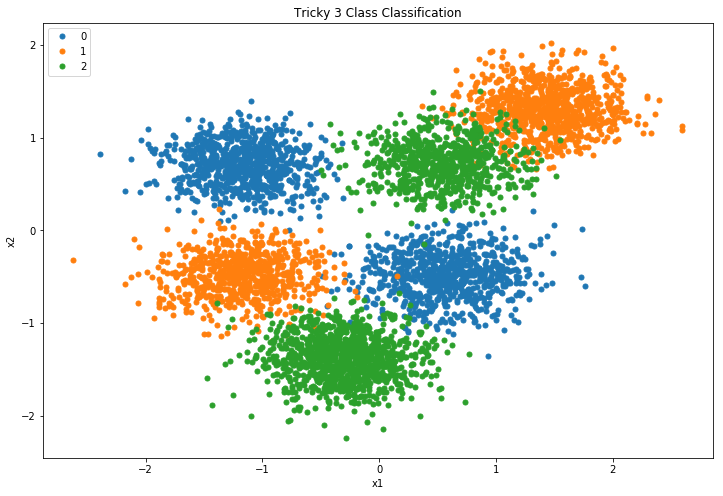

In [8]:
plot_data(X, y)

Now build your network. Good luck! 😉 

In [9]:
data = X
labels = y

In [258]:
class Linear():
    def __init__(self, *args):
        self.name = "Linear"
        self.in_units = args[0]
        self.out_units = args[1]
        
#         self.weight = np.zeros((self.out_units, self.in_units))
#         self.bias = np.zeros((self.out_units, 1))
        
        self.weight = np.random.rand(self.out_units, self.in_units)
        self.bias = np.random.rand(self.out_units, 1)
        
        self.grad_w = np.zeros((self.out_units, self.in_units))
        self.grad_b = np.zeros((self.out_units, 1))
    
    def get_input_size(self):
        return (self.in_units, 1)
    
    def zero_grad(self):
        self.grad_w = np.zeros((self.out_units, self.in_units))
        self.grad_b = np.zeros((self.out_units, 1))
        
    def apply(self, x):
        return np.dot(self.weight, x) + self.bias
    
    def backprop(self, grad, h_in, batch_size):
        grad_w = np.dot(grad, h_in.T)
        grad_b = grad
        self.grad_w += 1.0/batch_size * grad_w
        self.grad_b += 1.0/batch_size * grad_b
        return np.dot(self.weight.T, grad)
    
    def update(self, lr, alpha):
        self.weight -= lr*self.grad_w - alpha*self.weight/np.linalg.norm(self.weight)
        self.bias -= lr*self.grad_b - alpha*self.bias/np.linalg.norm(self.bias)
        self.zero_grad()
    
class ReLU():
    def __init__(self, *args):
        self.name = "ReLU"
        self.in_units = args[0]
        self.out_units = args[1]

    def get_input_size(self):
        return (self.in_units, 1)
    
    def zero_grad(self):
        pass
    
    def apply(self, x):
        return np.maximum(0, x) 
    
    def backprop(self, grad, h_in, *args):
        grad[np.where(h_in < 0)] = 0.0
        return grad

    def update(self, *args):
        pass
    
class softplus():
    def __init__(self, *args):
        self.name = "softplus"
        self.in_units = args[0]
        self.out_units = args[1]

    def get_input_size(self):
        return (self.in_units, 1)
    
    def zero_grad(self):
        pass
    
    def apply(self, x):
        x = np.clip(x, -500.0, 500.0)
        return np.log(1.0 + np.exp(x))
    
    def backprop(self, grad, h_in, *args):
        h_in = np.clip(h_in, -500.0, 500.0)
        grad = np.multiply(grad, 1.0 / (1 + np.exp(-h_in)))
        return grad
    
    def update(self, *args):
        pass
    
class softmax():
    def __init__(self, *args):
        self.name = "softmax"
        self.in_units = args[0]
        self.out_units = args[1]
    
    def likelihood(self, batch_out, scale = 10.0e4):
#         print('likelihood')
        batch_out = np.clip(batch_out, -500, 500)
        e_out = np.exp(batch_out)
#         print("likelihood:", batch_out, e_out)
        e_sum = np.sum(e_out, axis = 1)
        P = e_out / e_sum[:, np.newaxis, :]
        return P
    
    def apply(self, out, y, batch_size, scale = 10.0e4):
#         print('apply')
        out = np.clip(out, -500, 500)
        e_out = np.exp(out)
#         print("Apply:", out, e_out)
        log_sum = np.sum(e_out, axis = 0)
        label = int(y.item((0, 0)))
        logP = - e_out[label, :] + log_sum
        return logP
    
    def get_input_size(self):
        return (self.in_units, 1)
    
    def backprop(self, z, y, scale = 10.0e4):
#         print('backprop')
        z = np.clip(z, -500, 500)
        e_z = np.exp(z)
#         print("Backprop:", z, e_z)
        e_z = np.clip(e_z, -500, 500)
        grad = np.exp(z) / np.sum(np.exp(z))
        label = int(y.item((0, 0)))
        grad[label, :] -= 1.0
        return grad

In [206]:
class Network():
    def __init__(self, in_dims, num_classes, 
                 hidden_layers = [], hlayer = "Linear",
                 activation = "ReLU", loss = "softmax"):
        self.in_dims = in_dims
        self.num_features = self.in_dims[0]
        self.num_classes = num_classes
        self.layers = []
        self.inputs = []
        self.loss = None
        
        if len(hidden_layers) > 0:
            self.add_init_layers(hidden_layers, hlayer, 
                                 activation)
            self.add_loss(loss)
        
    def add_init_layers(self, layers, hlayer, activation):
        self.add_layer(hlayer, self.num_features, layers[0])
        self.add_layer(activation, layers[0], layers[0])
        for l in range(1, len(layers)):
            self.add_layer(hlayer, layers[l - 1], layers[l])
            self.add_layer(activation, layers[l], layers[l])
        self.add_layer(hlayer, layers[len(layers) - 1], self.num_classes)
        
        
    def add_layer(self, layer_name, *args):
        layer = getattr(sys.modules[__name__], layer_name)
        self.layers.append(layer(*args))
        
    def add_loss(self, loss_name):
        loss = getattr(sys.modules[__name__], loss_name)
        self.loss = loss(self.num_classes, 1)
    

    def model_compile(self):
        pass
    
    def model_print(self):
        print("\n==== Model Summary ====")
        print("Model Input: ", self.in_dims)
        for l in range(len(self.layers)):
            print("Layer: %s \t In, Out: (%d, %d)" 
                  %(self.layers[l].name, 
                    self.layers[l].in_units, self.layers[l].out_units))
        print("Loss: %s\n" %self.loss.name)
        
    def _forward(self, x, idx, do_train = True):
        out = x
        for l in range(len(self.layers)):
            if do_train:
                self.inputs[l][idx, ::] = out
            out = self.layers[l].apply(out)
        return out
    
    def _backward(self, y, z, idx, batch_size):
        grad = self.loss.backprop(z, y)
        for l in range(len(self.layers) - 1, -1, -1):
            h_in = self.inputs[l][idx, ::]
            grad = self.layers[l].backprop(grad, h_in, batch_size)
        return
        
    def forward(self, batch_x, do_train = True):
        self.inputs.append(batch_x)
        batch_size = batch_x.shape[0]
        self.batch_out = np.zeros((batch_size, self.num_classes, 1))
        
        if do_train:
            self.inputs = []
            for l in range(len(self.layers)):
                size = (batch_size, ) + self.layers[l].get_input_size()
                self.layers[l].zero_grad()
                self.inputs.append(np.zeros(size))
            
        for idx in range(batch_size):
            x = batch_x[idx, ::]
            x = x.reshape(self.in_dims[0], 1)
            out = self._forward(x, idx, do_train)
            out = out.reshape(self.num_classes, 1)
            self.batch_out[idx, ::] = out
        return self.batch_out
    
    def backward(self, batch_y):
        batch_size = batch_y.shape[0]
        for idx in range(batch_size):
            y = batch_y[idx, ::]
            y = y.reshape(1, 1)
            out = self.batch_out[idx, ::]
            out = out.reshape(self.num_classes, 1)
            self._backward(y, out, idx, batch_size)
            
    def update_batch(self, lr, alpha, batch_size):
        for l in range(len(self.layers)):
            self.layers[l].update(lr, alpha)
        
        self.inputs = []
        for l in range(len(self.layers)):
            size = (batch_size, ) + self.layers[l].get_input_size()
            self.inputs.append(np.zeros(size))
        return
    
    def compute_loss(self, batch_out, batch_y):
        batch_size = batch_out.shape[0]
        loss = 0.0
        for idx in range(batch_size):
            out = batch_out[idx, ::]
            out = out.reshape(self.num_classes, 1)
            y = batch_y[idx, ::]
            y = y.reshape(1, 1)
            loss += self.loss.apply(out, y, batch_size)
    
        loss /= batch_size
        return loss
    
    def predict(self, out):
        P = self.loss.likelihood(out)
        pred_labels = np.argmax(P, axis = 1)
        pred_labels = pred_labels.reshape(out.shape[0], 1)
        return pred_labels
        
        
    def accuracy(self, out, labels):
        test_n = labels.shape[0]
        pred_labels = self.predict(out)
        matches = np.sum(labels == pred_labels)
        return matches * 100.0 / test_n
        
    def train(self, data, labels, test_data, test_labels,
              epochs = 10, batch_size = 16, 
              lr = 0.01, alpha = 0.02,
              seed = None):
        
        if seed is not None:
            self.seed = seed
        else:
            self.seed = np.random.randint(1, 1000)

        print("Training seed: %d" %self.seed)
        np.random.seed(self.seed)
        
        n_train = data.shape[0]
        num_batches = int(n_train / (batch_size + 1))
        train_idx = np.arange(data.shape[0])

        
        self.train_loss = np.zeros((epochs, 1))
        self.train_acc = np.zeros((epochs, 1))
        self.test_loss = np.zeros((epochs, 1))
        self.test_acc = np.zeros((epochs, 1))
        for epoch in range(epochs):
            np.random.shuffle(train_idx)
            for batch_idx in range(num_batches):
                idx = range(batch_idx*batch_size, (batch_idx + 1)*batch_size)
                batch_x = data[idx, ::]
                batch_y = labels[idx, ::]
                batch_out = self.forward(batch_x, do_train = True)
                batch_loss = self.compute_loss(batch_out, batch_y)
                self.train_loss[epoch, :] = batch_loss
                self.train_acc[epoch, :] = self.accuracy(batch_out, batch_y)
                self.backward(batch_y)
                self.update_batch(lr, alpha, batch_size)
            test_loss, test_acc = self.evaluate(test_data, test_labels)
            self.test_loss[epoch, :] = test_loss
            self.test_acc[epoch, :] = test_acc
        return
    
    def evaluate(self, data, labels):
        out = self.forward(data, do_train = False)
        test_loss = self.compute_loss(out, labels)
        test_acc = self.accuracy(out, labels)
        return (test_loss, test_acc)

In [203]:
def generate_data(rmin, rmax, points):
    idx = np.linspace(rmin, rmax, points)
    x1, x2 = np.meshgrid(idx, idx)
    new_x = np.zeros((points * points, 2))
    new_x[:, 0] = x1.flatten()
    new_x[:, 1] = x2.flatten()
    return new_x

In [202]:
def plot_decision_boundary(ax, net, acc, new_data, new_labels):
    
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    indices_0 = [k for k in range(0, new_data.shape[0])
                 if new_labels[k] == 0]
    indices_1 = [k for k in range(0, new_data.shape[0])
                 if new_labels[k] == 1]
    indices_2 = [k for k in range(0, new_data.shape[0]) 
                 if new_labels[k] == 2]

    ax.plot(new_data[indices_0, 0], new_data[indices_0,1],
            marker='o', linestyle='', ms=5, label='0')
    ax.plot(new_data[indices_1, 0], new_data[indices_1,1],
            marker='o', linestyle='', ms=5, label='1')
    ax.plot(new_data[indices_2, 0], new_data[indices_2,1], 
            marker='o', linestyle='', ms=5, label='2')

    ax.legend()
    ax.legend(loc = 2)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title('Decision Region: %.2f %% Test Accuracy' %acc)
#     plt.show()

In [201]:
def plot_loss(tr_loss, test_loss, title = "Loss over epochs"):
    idx = np.arange(tr_loss.shape[0])
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.plot(idx, tr_loss, marker = 'o', 
            linestyle = '-', label = "Training Loss")
    ax.plot(idx, test_loss, marker = 'o',
           linestyle = '--', label = "Test Loss")
    
    ax.legend()
    ax.legend(loc = 3)
    ax.set_xlabel("Number of epochs")
    ax.set_ylabel("Softmax Loss")
    ax.set_title(title)
    plt.show()
    
def plot_acc(tr_acc, test_acc, title = "Accuracy over epochs"):
    idx = np.arange(net.train_acc.shape[0])
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.plot(idx, tr_acc, marker = 'o', 
            linestyle = '-', label = "Training Accuracy")
    ax.plot(idx, test_acc, marker = 'o', 
            linestyle = '--', label = "Test Accuracy")
    
    ax.legend()
    ax.legend(loc = 3)
    ax.set_xlabel("Number of epochs")
    ax.set_ylabel("Accuracy in %")
    ax.set_title(title)
    plt.show()

In [248]:
layers = [16, 16, 16]
alpha = 0.00001
net = Network((num_features, 1), num_classes, 
      hidden_layers = layers)
net.model_print()
net.train(data[:4000, ::], labels[:4000, :], 
          data[-1000:, ::], labels[-1000:, ::],
          alpha = alpha, epochs = 23, seed = 618)

test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


==== Model Summary ====
Model Input:  (2, 1)
Layer: Linear 	 In, Out: (2, 16)
Layer: ReLU 	 In, Out: (16, 16)
Layer: Linear 	 In, Out: (16, 16)
Layer: ReLU 	 In, Out: (16, 16)
Layer: Linear 	 In, Out: (16, 16)
Layer: ReLU 	 In, Out: (16, 16)
Layer: Linear 	 In, Out: (16, 3)
Loss: softmax

Training seed: 618
Test Loss: [4.98343227e+100]
Test Accuracy: 60.9


### Alpha = 0.0, Activation: ReLU


==== Model Summary ====
Model Input:  (2, 1)
Layer: Linear 	 In, Out: (2, 3)
Layer: ReLU 	 In, Out: (3, 3)
Layer: Linear 	 In, Out: (3, 3)
Loss: softmax

Training seed: 618
Test Loss: [113.12217474]
Test Accuracy: 87.5

==== Model Summary ====
Model Input:  (2, 1)
Layer: Linear 	 In, Out: (2, 8)
Layer: ReLU 	 In, Out: (8, 8)
Layer: Linear 	 In, Out: (8, 3)
Loss: softmax

Training seed: 618
Test Loss: [6926375.08093234]
Test Accuracy: 93.3

==== Model Summary ====
Model Input:  (2, 1)
Layer: Linear 	 In, Out: (2, 16)
Layer: ReLU 	 In, Out: (16, 16)
Layer: Linear 	 In, Out: (16, 3)
Loss: softmax

Training seed: 618
Test Loss: [1.74085768e+10]
Test Accuracy: 95.6

==== Model Summary ====
Model Input:  (2, 1)
Layer: Linear 	 In, Out: (2, 3)
Layer: ReLU 	 In, Out: (3, 3)
Layer: Linear 	 In, Out: (3, 3)
Layer: ReLU 	 In, Out: (3, 3)
Layer: Linear 	 In, Out: (3, 3)
Layer: ReLU 	 In, Out: (3, 3)
Layer: Linear 	 In, Out: (3, 3)
Loss: softmax

Training seed: 618
Test Loss: [3.95747914e+17]
Test

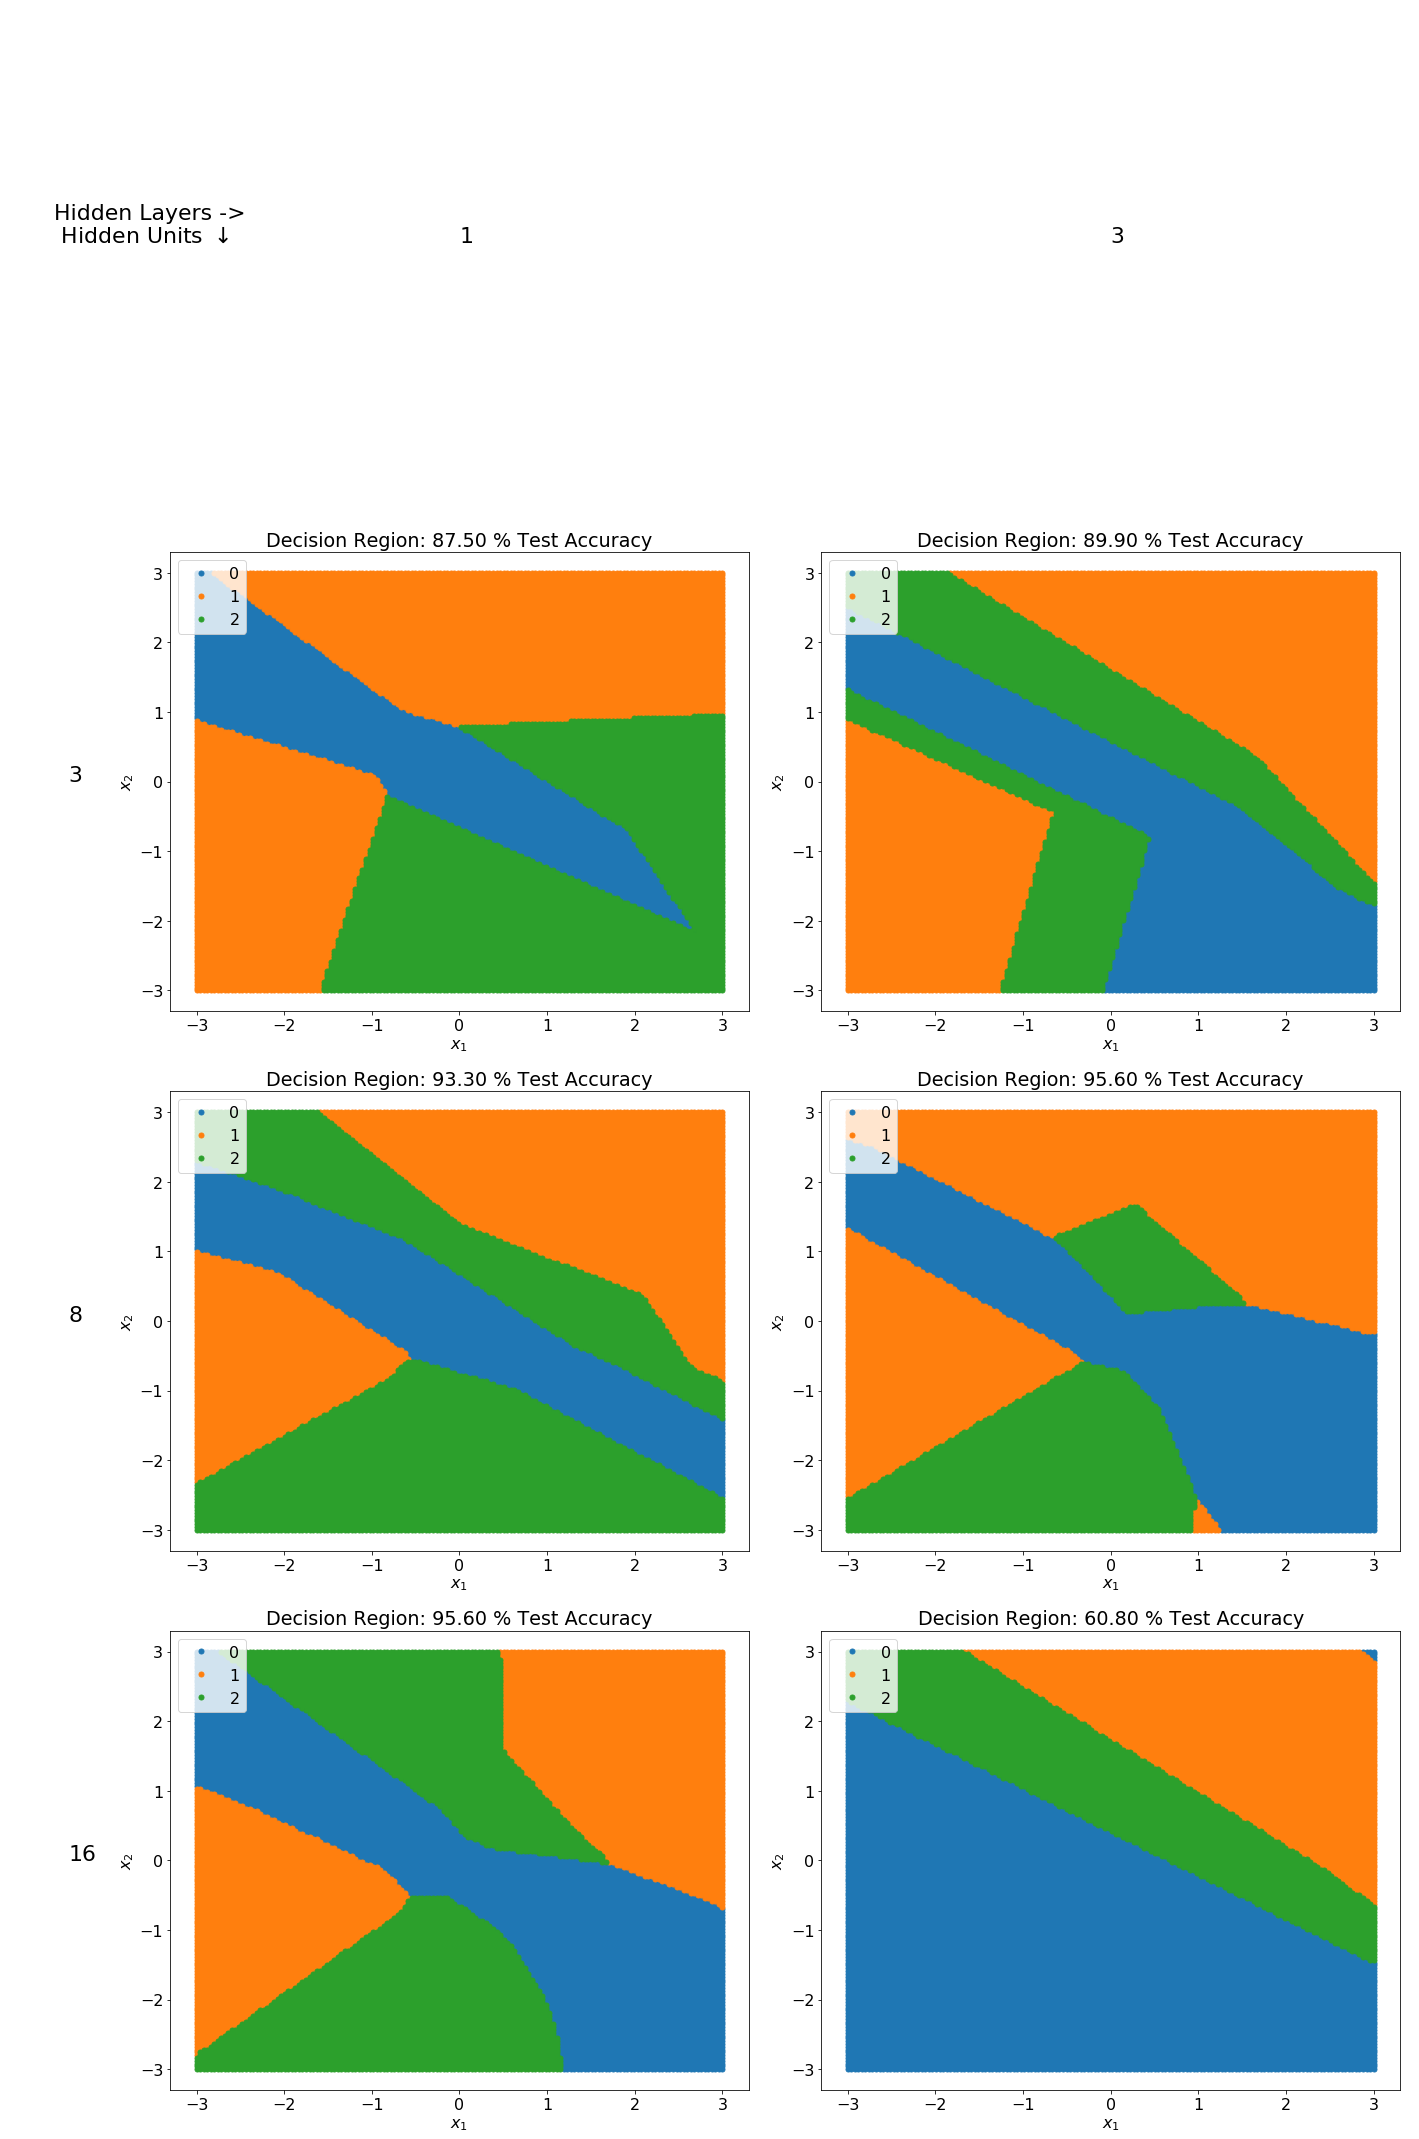

In [250]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.0


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers)
        net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.01, Activation = ReLU

Training seed: 618
Test Loss: [6.35851898e+216]
Test Accuracy: 64.7
Training seed: 618
Test Loss: [1.00564441e+217]
Test Accuracy: 72.0
Training seed: 618
Test Loss: [8.66661205e+216]
Test Accuracy: 78.4
Training seed: 618
Test Loss: [6.89287026e+13]
Test Accuracy: 34.4
Training seed: 618
Test Loss: [1.91775059e+30]
Test Accuracy: 46.4
Training seed: 618
Test Loss: [2.11304644e+179]
Test Accuracy: 34.4


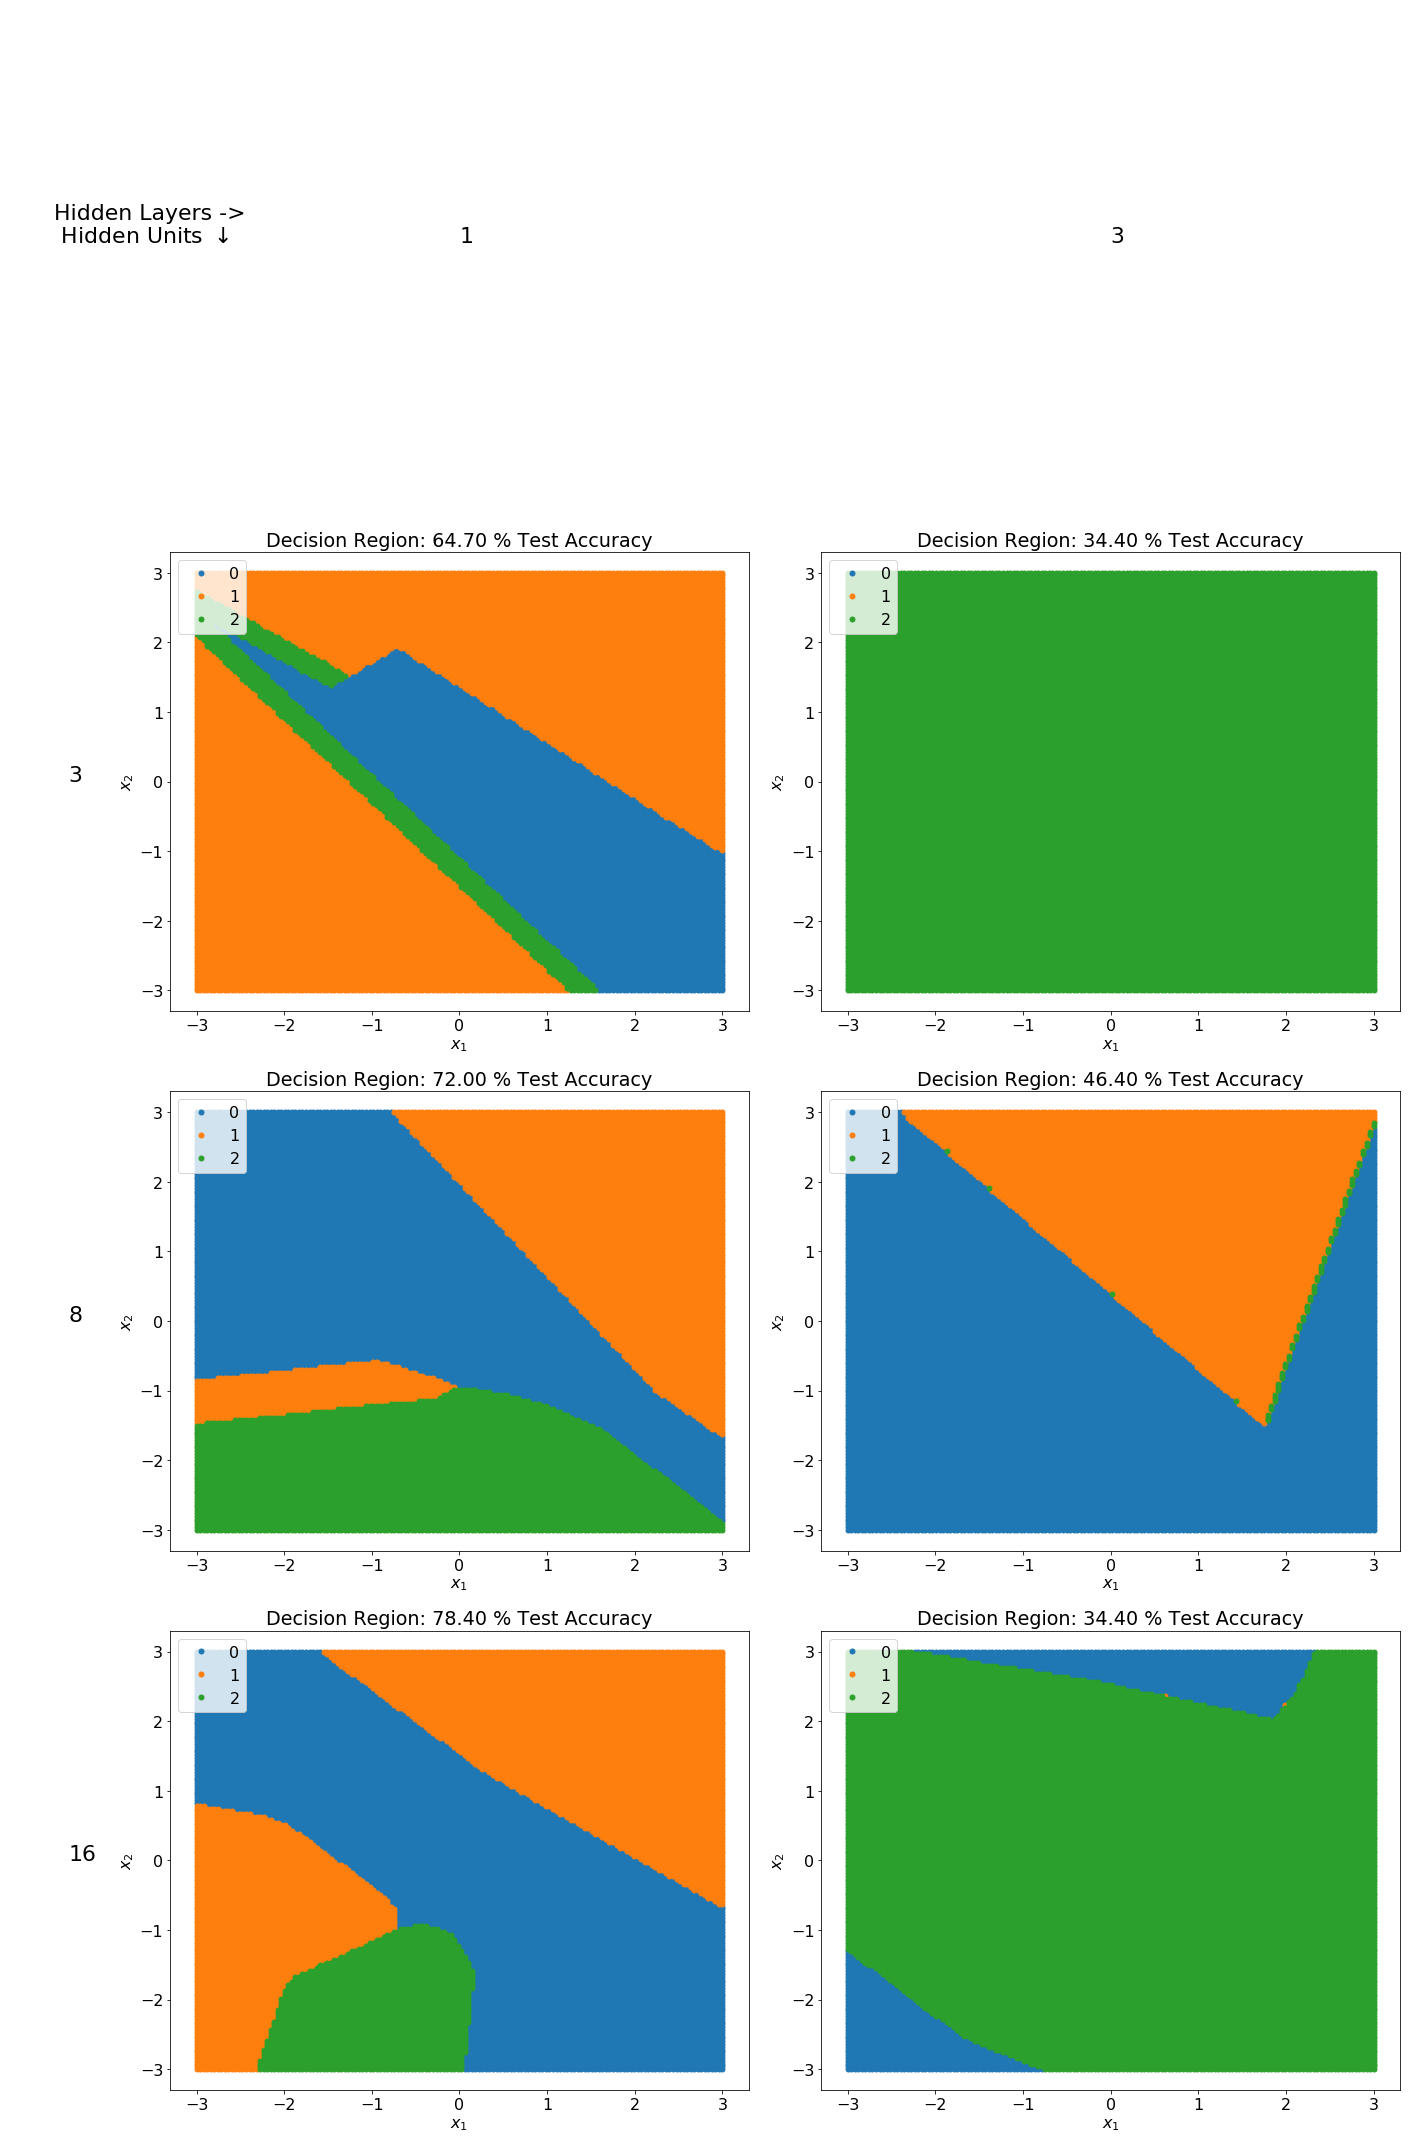

In [251]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.01


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.001, Activation = ReLU

Training seed: 618
Test Loss: [8.25993895e+34]
Test Accuracy: 80.2
Training seed: 618
Test Loss: [1.4979726e+45]
Test Accuracy: 94.7
Training seed: 618
Test Loss: [2.49355549e+55]
Test Accuracy: 95.7
Training seed: 618
Test Loss: [4.2129221e+214]
Test Accuracy: 91.3
Training seed: 618
Test Loss: [2.28135051e+125]
Test Accuracy: 94.2
Training seed: 618
Test Loss: [5.14731716e+08]
Test Accuracy: 49.9


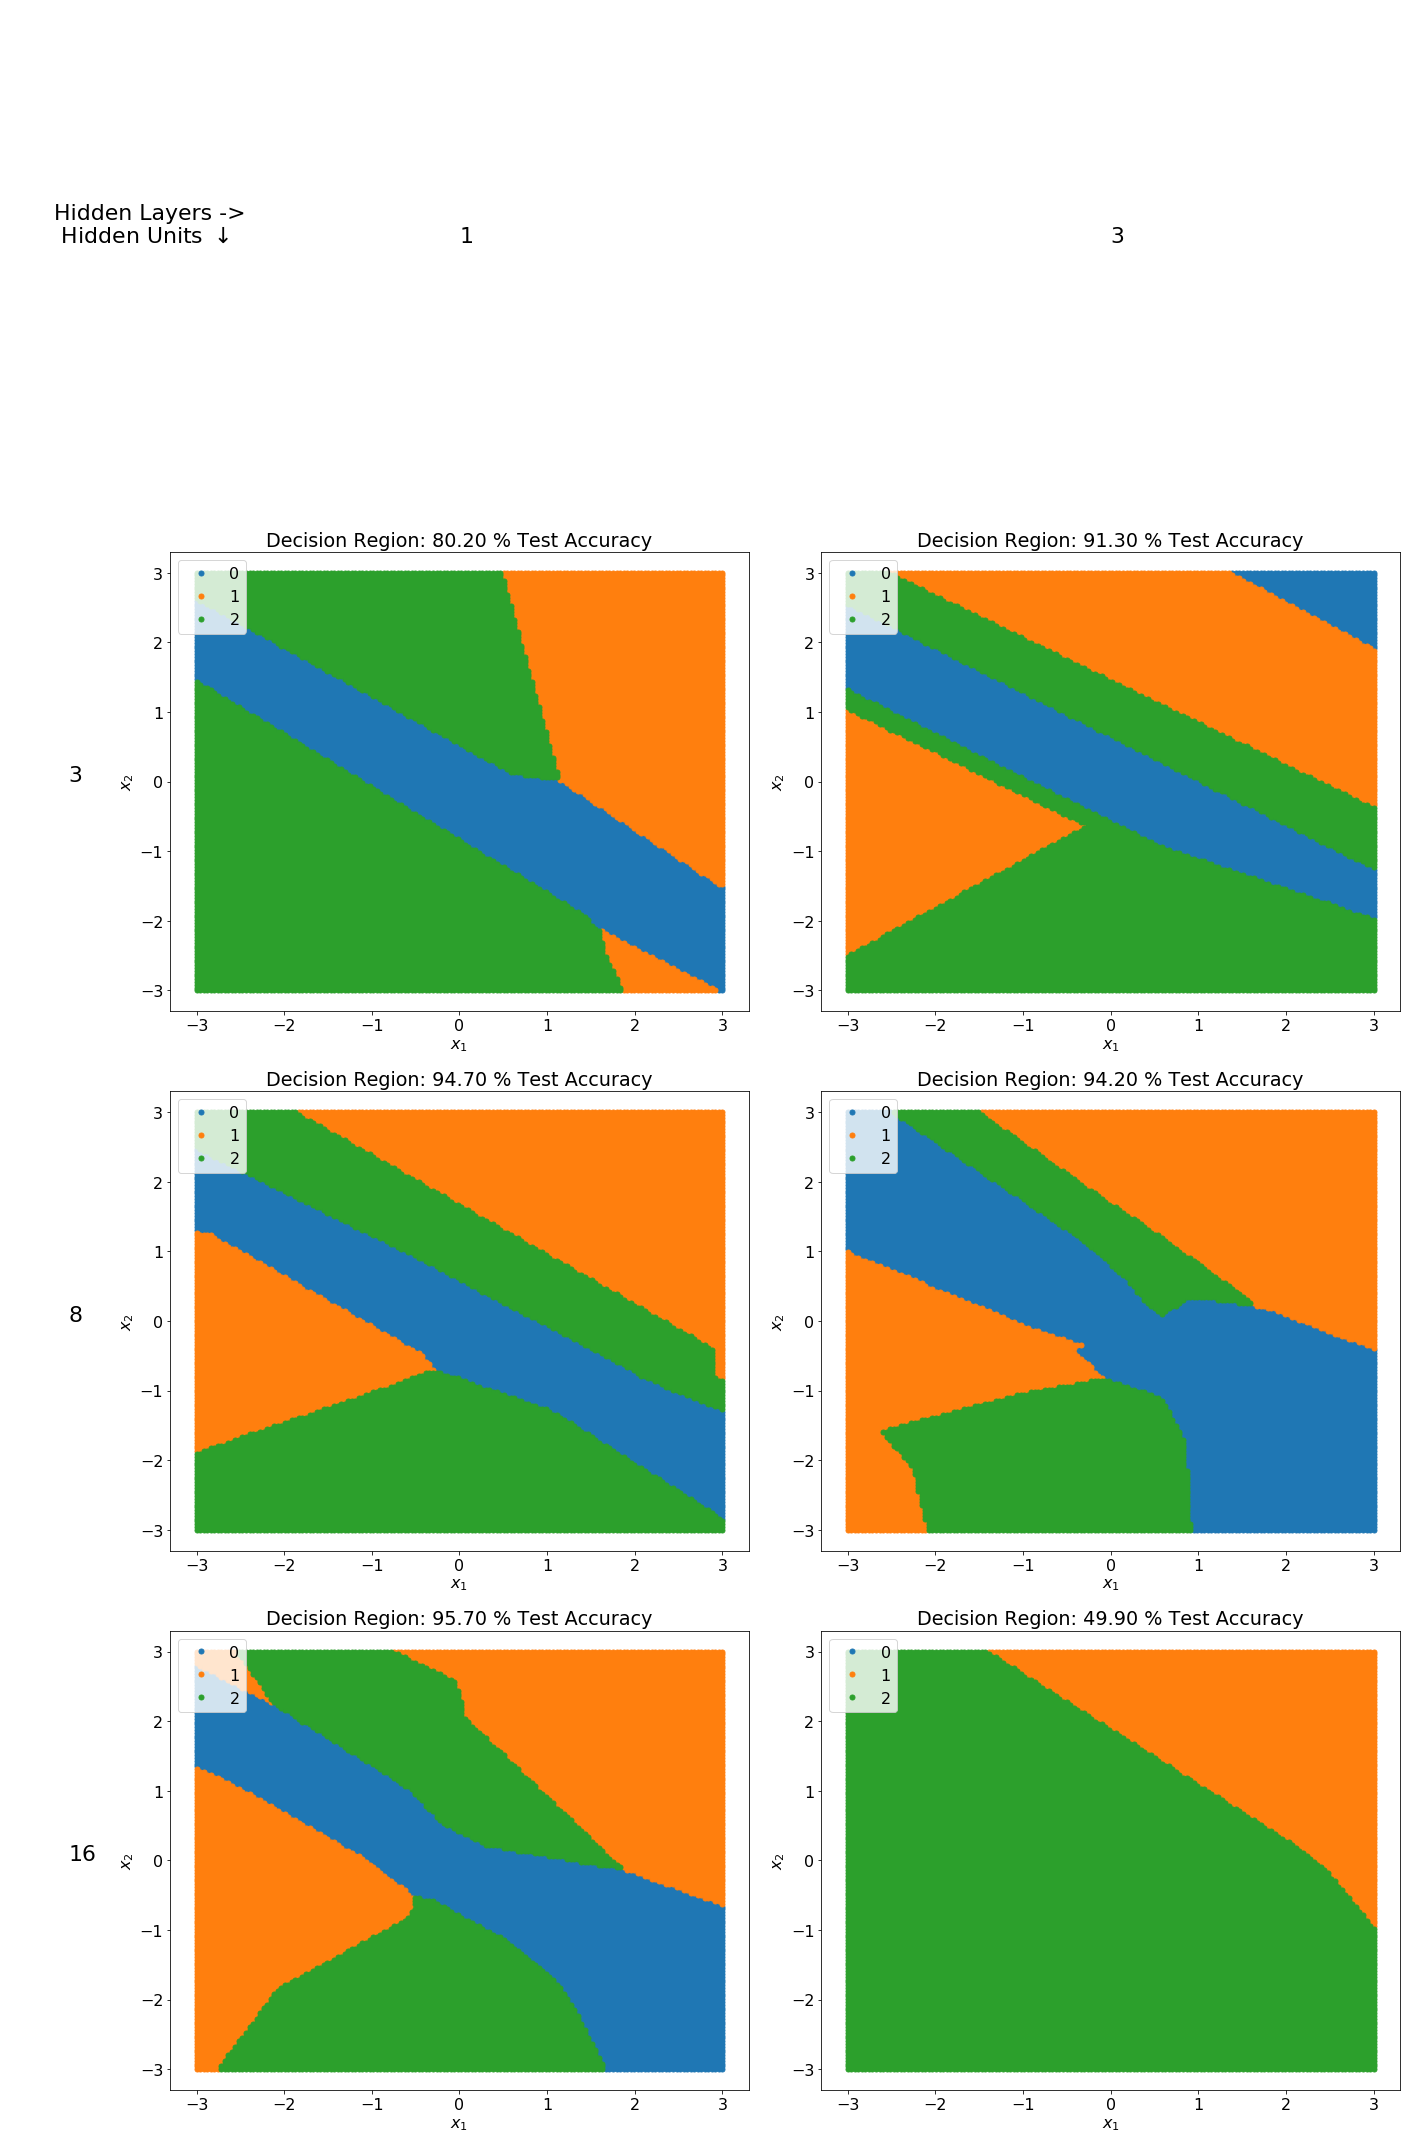

In [252]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.001


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.00001, Activation = ReLU

Training seed: 618
Test Loss: [6276.73396089]
Test Accuracy: 80.4
Training seed: 618
Test Loss: [10815790.93477255]
Test Accuracy: 93.4
Training seed: 618
Test Loss: [3.11086097e+10]
Test Accuracy: 95.5
Training seed: 618
Test Loss: [3.60084235e+18]
Test Accuracy: 89.9
Training seed: 618
Test Loss: [1.57968789e+21]
Test Accuracy: 95.7
Training seed: 618
Test Loss: [4.98343227e+100]
Test Accuracy: 60.9


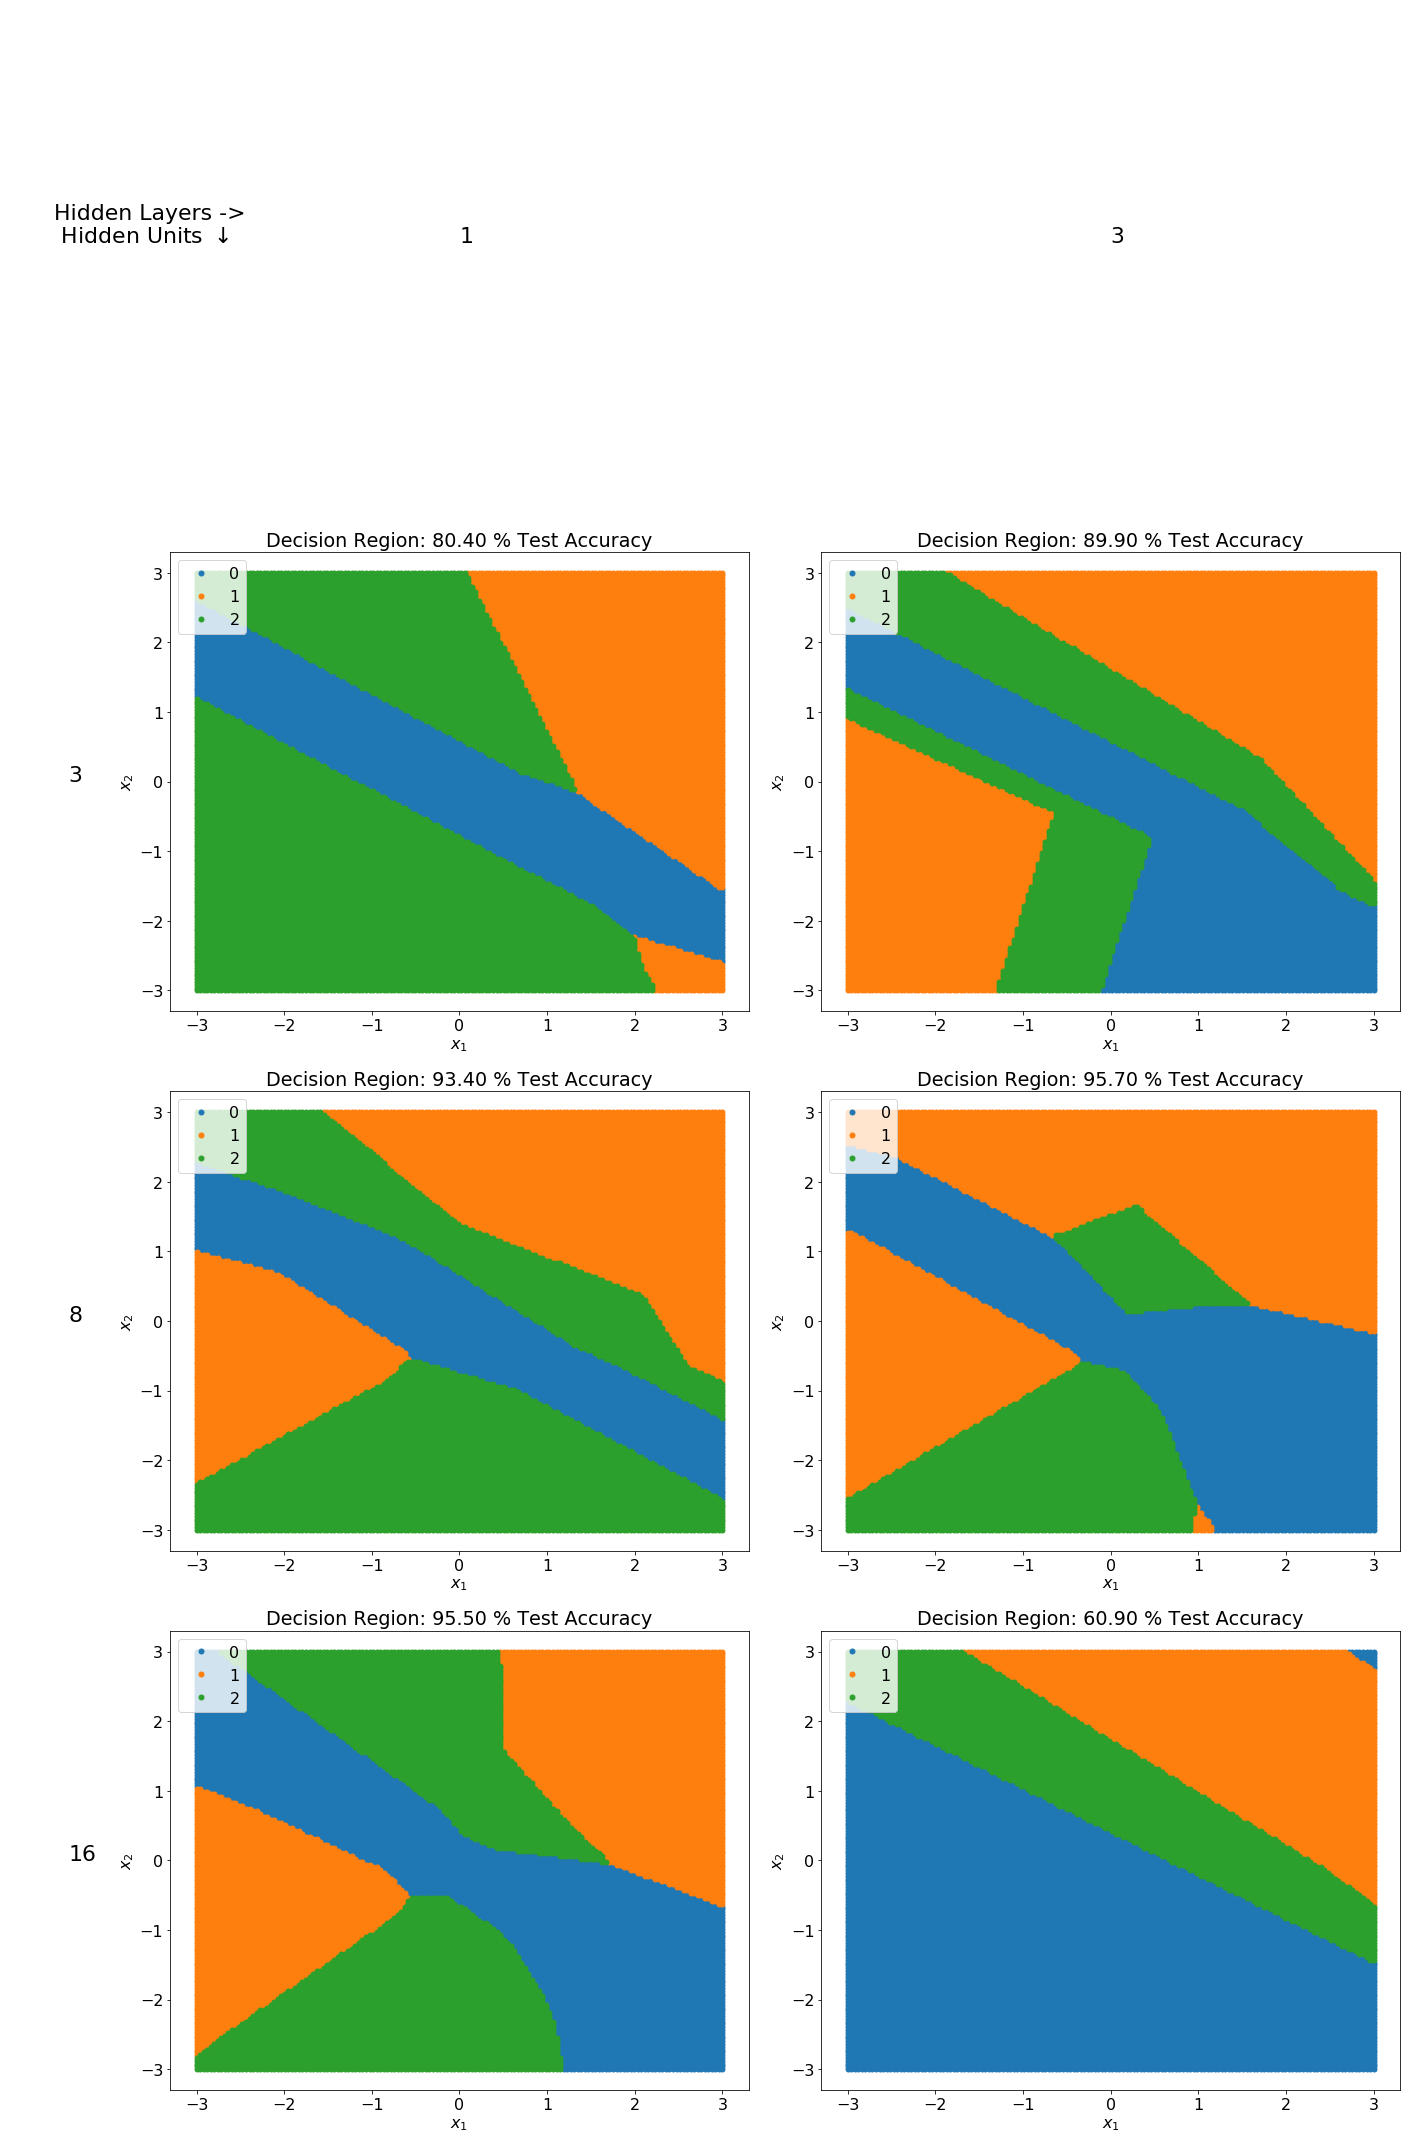

In [253]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.00001


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.0, Activation = Softmax

Training seed: 618
Test Loss: [556.99790297]
Test Accuracy: 69.4
Training seed: 618
Test Loss: [23780.1737474]
Test Accuracy: 58.5
Training seed: 618
Test Loss: [1.19652543e+10]
Test Accuracy: 81.9
Training seed: 618
Test Loss: [2.11327512e+09]
Test Accuracy: 59.2
Training seed: 618
Test Loss: [1.48124992e+31]
Test Accuracy: 94.6
Training seed: 618
Test Loss: [4.80778834e+61]
Test Accuracy: 93.9


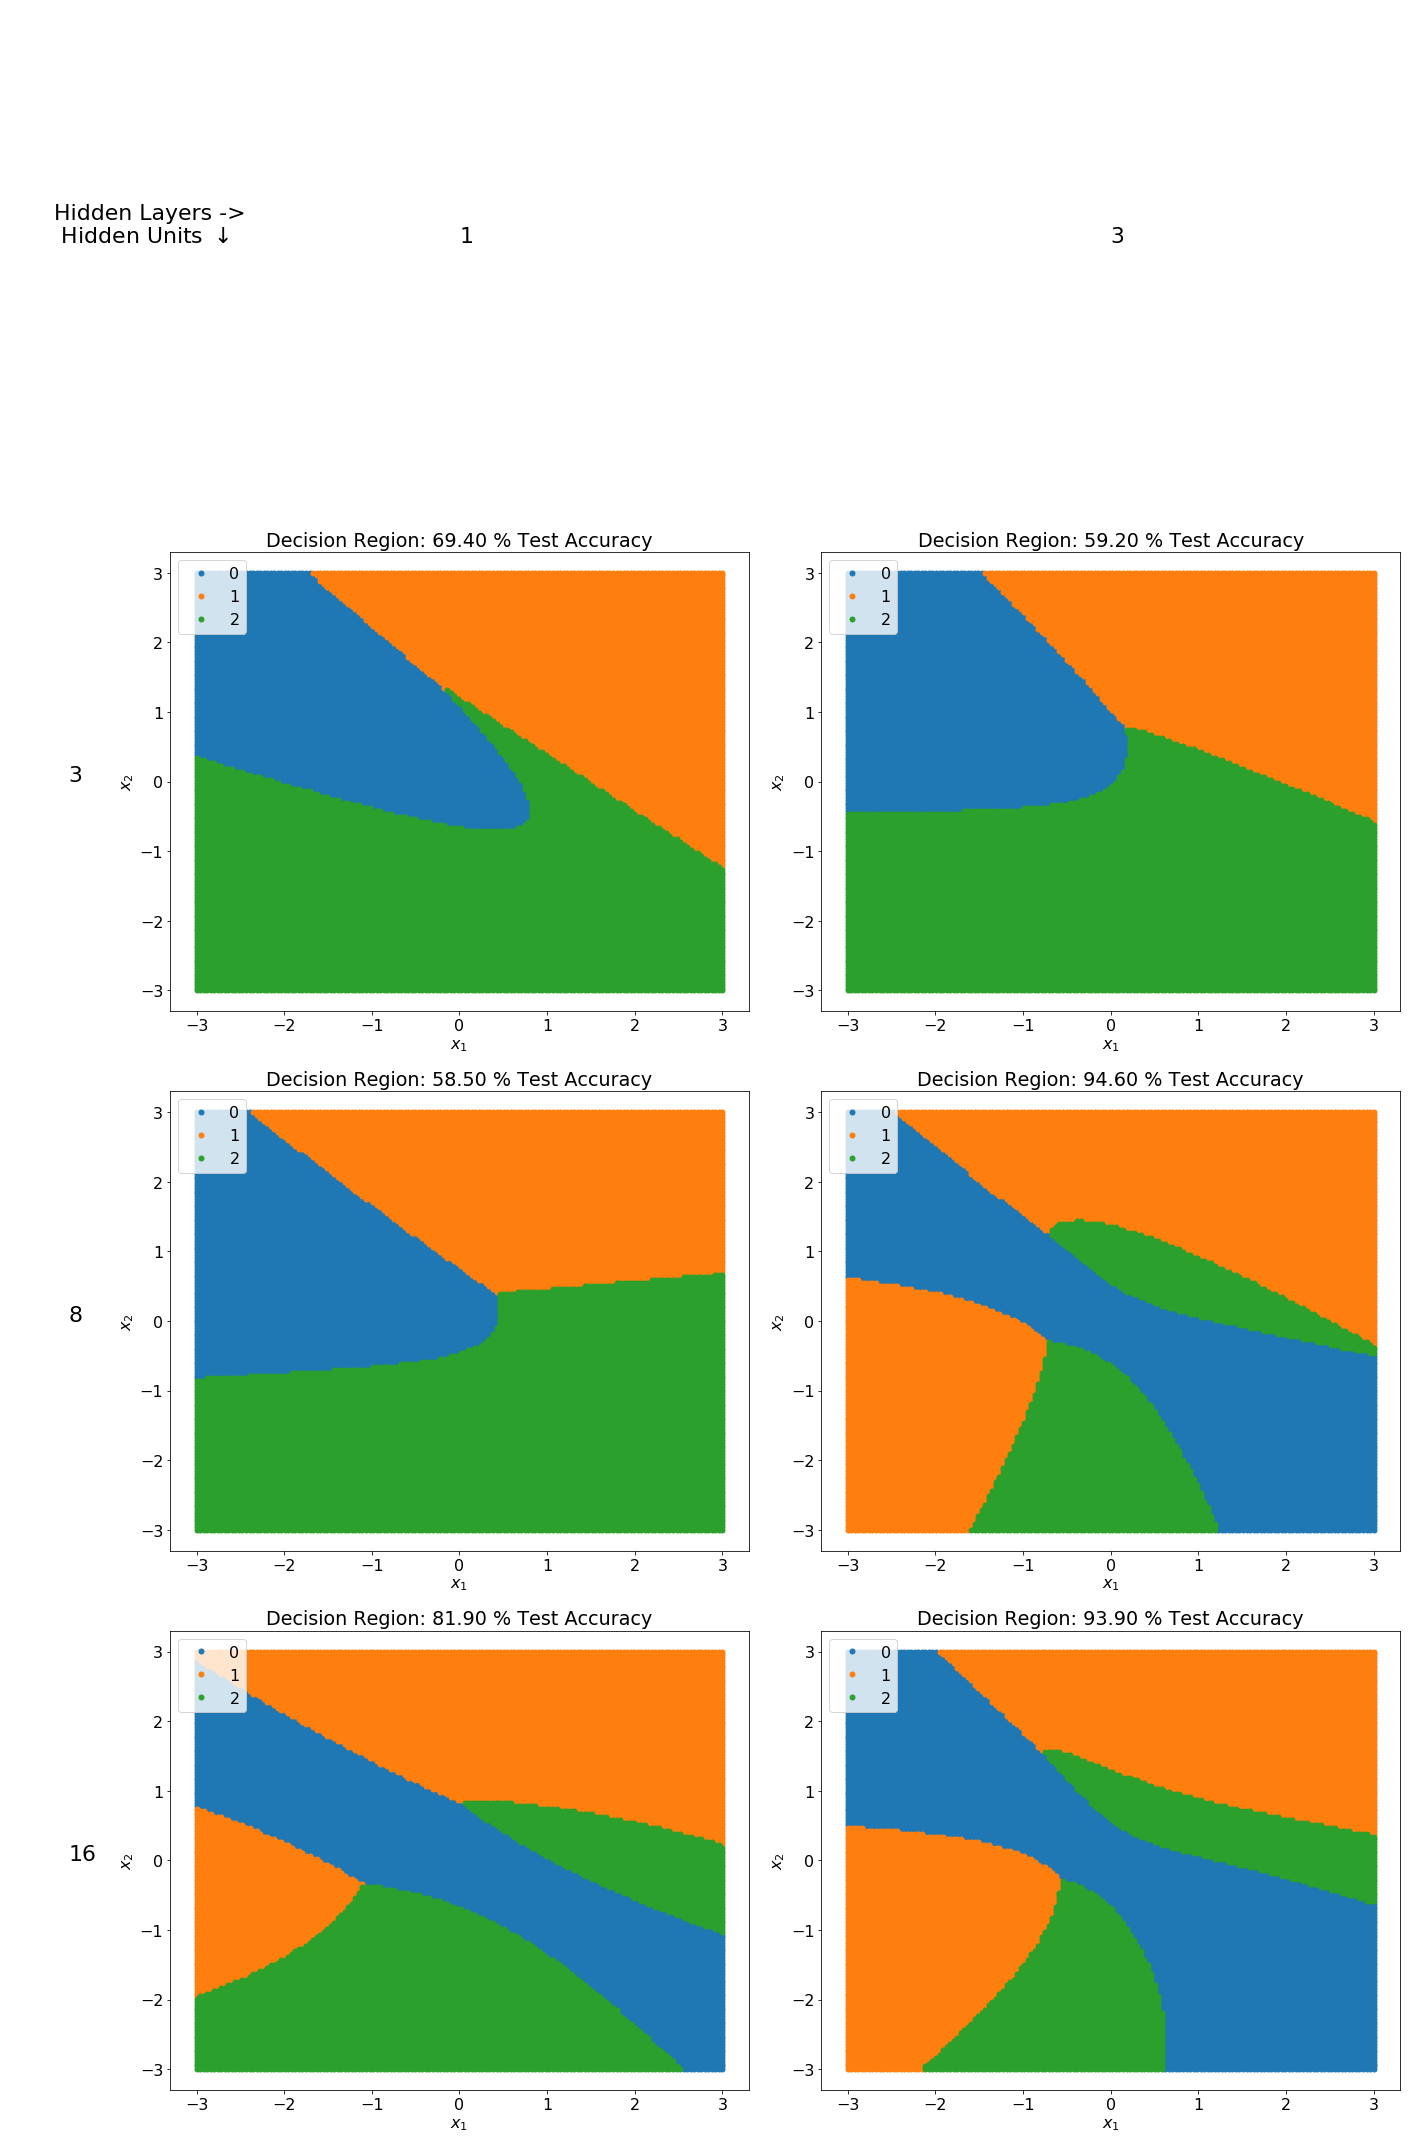

In [254]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.0
act = "softplus"


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers, activation = act)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.01, Activation = Softmax

Training seed: 618
Test Loss: [6.16530684e+216]
Test Accuracy: 54.7
Training seed: 618
Test Loss: [9.52170723e+216]
Test Accuracy: 73.6
Training seed: 618
Test Loss: [8.82441238e+216]
Test Accuracy: 77.1
Training seed: 618
Test Loss: [4.15036266e+216]
Test Accuracy: 50.4
Training seed: 618
Test Loss: [8.64428671e+13]
Test Accuracy: 34.4
Training seed: 618
Test Loss: [9.30193937e+107]
Test Accuracy: 46.6


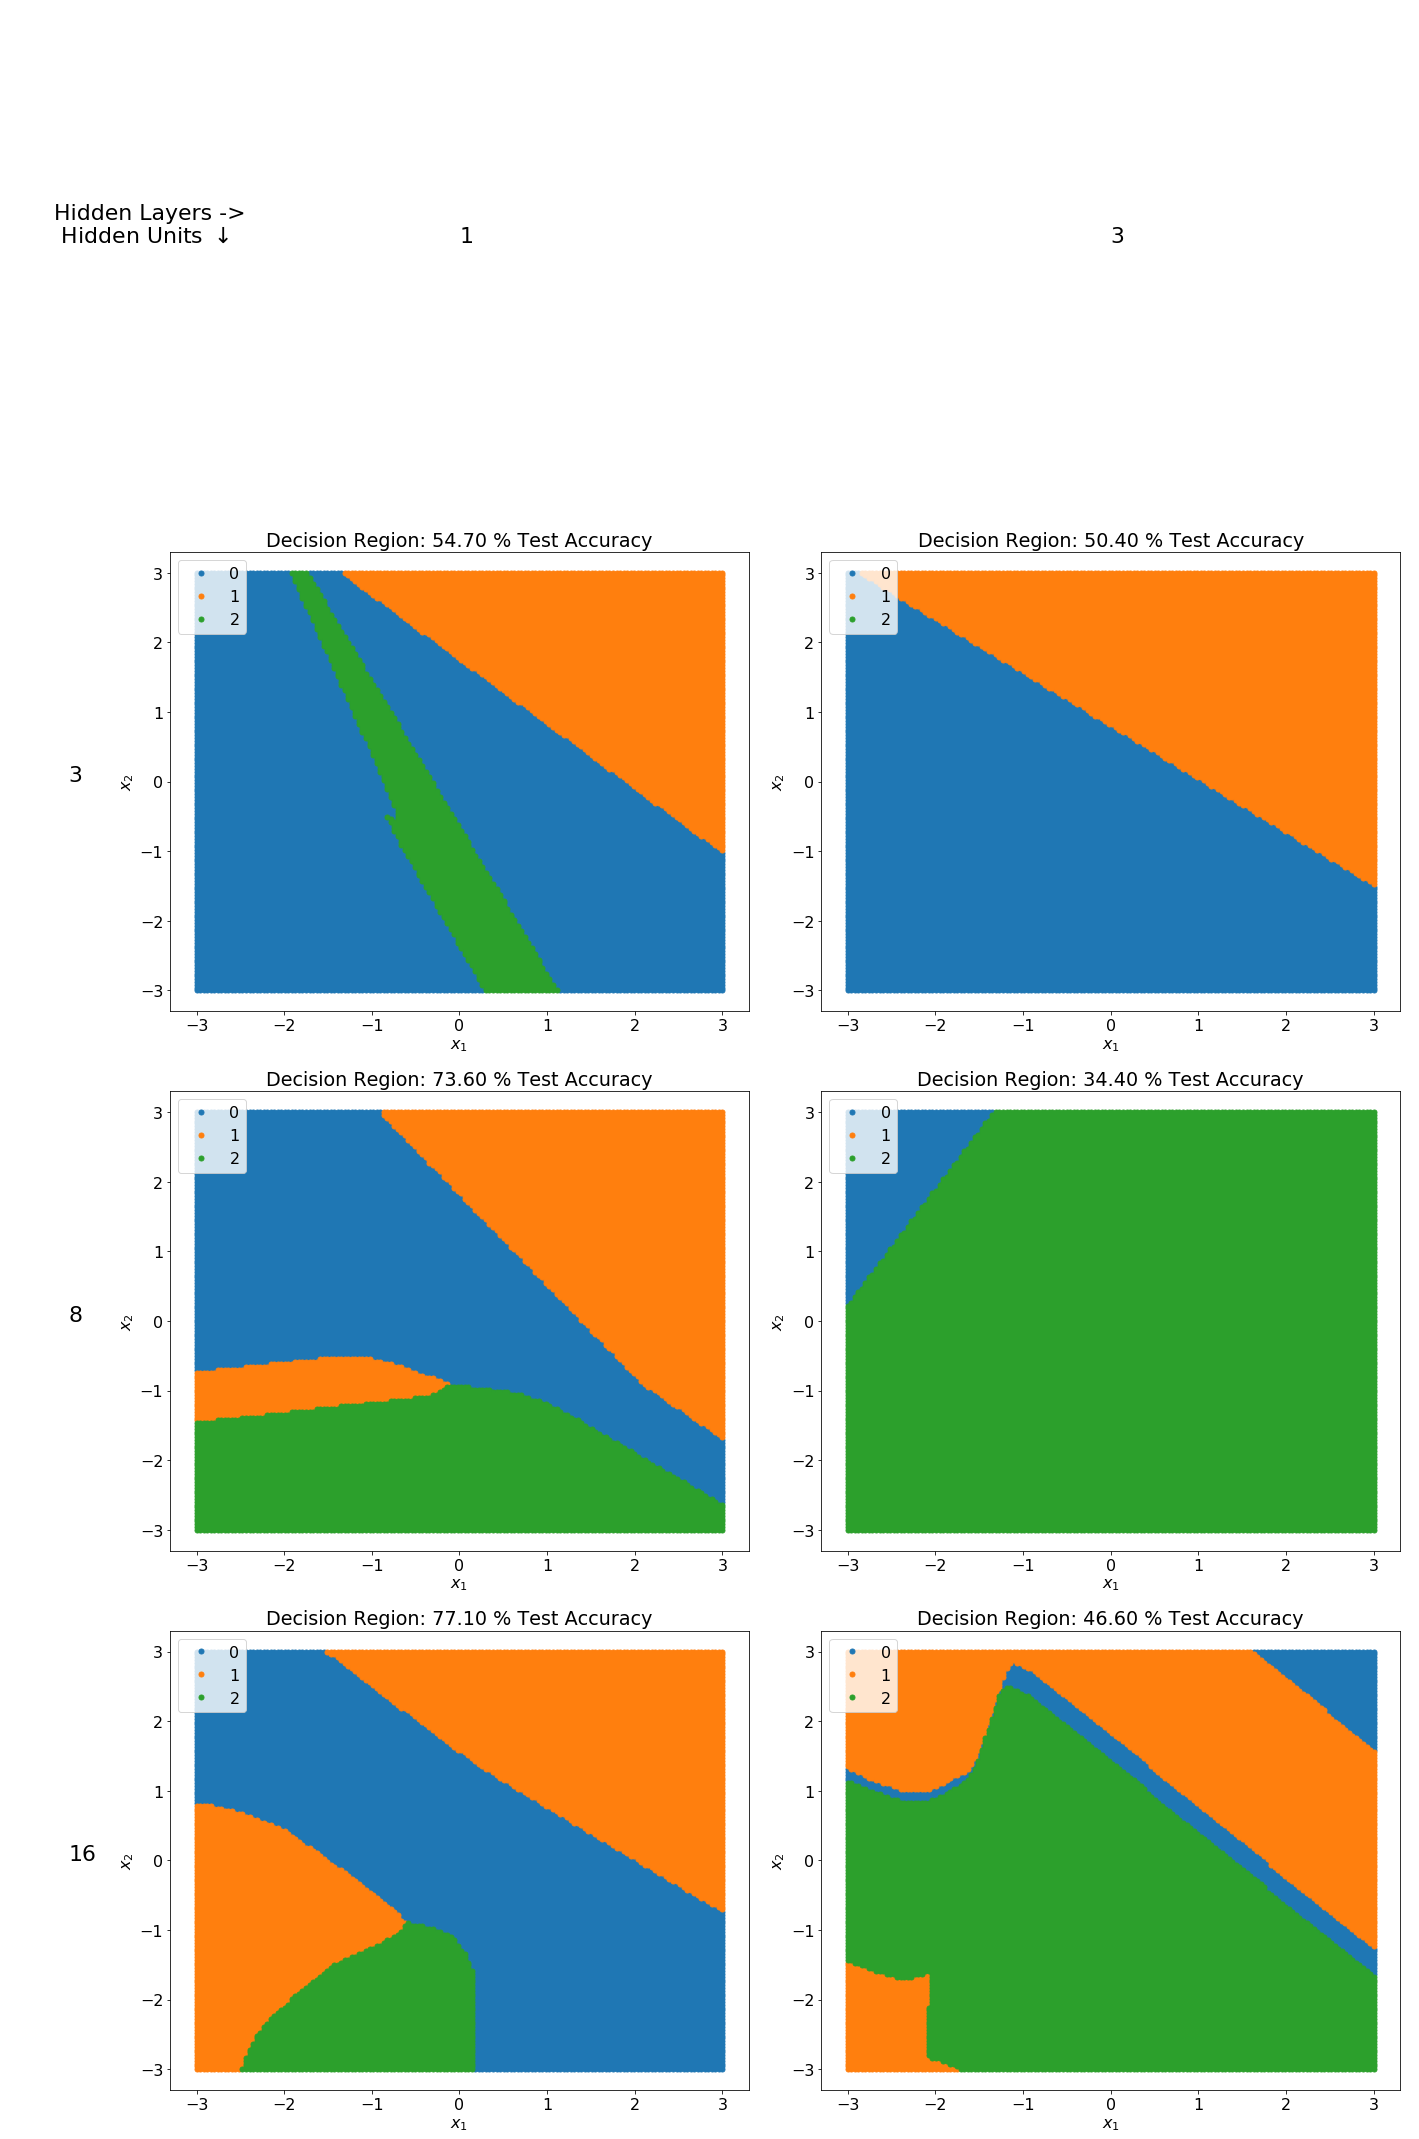

In [259]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.01
act = "softplus"


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers, activation = act)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.0001, Activation: Softplus

Training seed: 618
Test Loss: [95858.98149444]
Test Accuracy: 77.8
Training seed: 618
Test Loss: [3367748.71311959]
Test Accuracy: 61.4
Training seed: 618
Test Loss: [1.5224415e+13]
Test Accuracy: 85.8
Training seed: 618
Test Loss: [7.01423463e+25]
Test Accuracy: 76.5
Training seed: 618
Test Loss: [1.59176926e+38]
Test Accuracy: 94.9
Training seed: 618
Test Loss: [1.99746869e+75]
Test Accuracy: 93.9


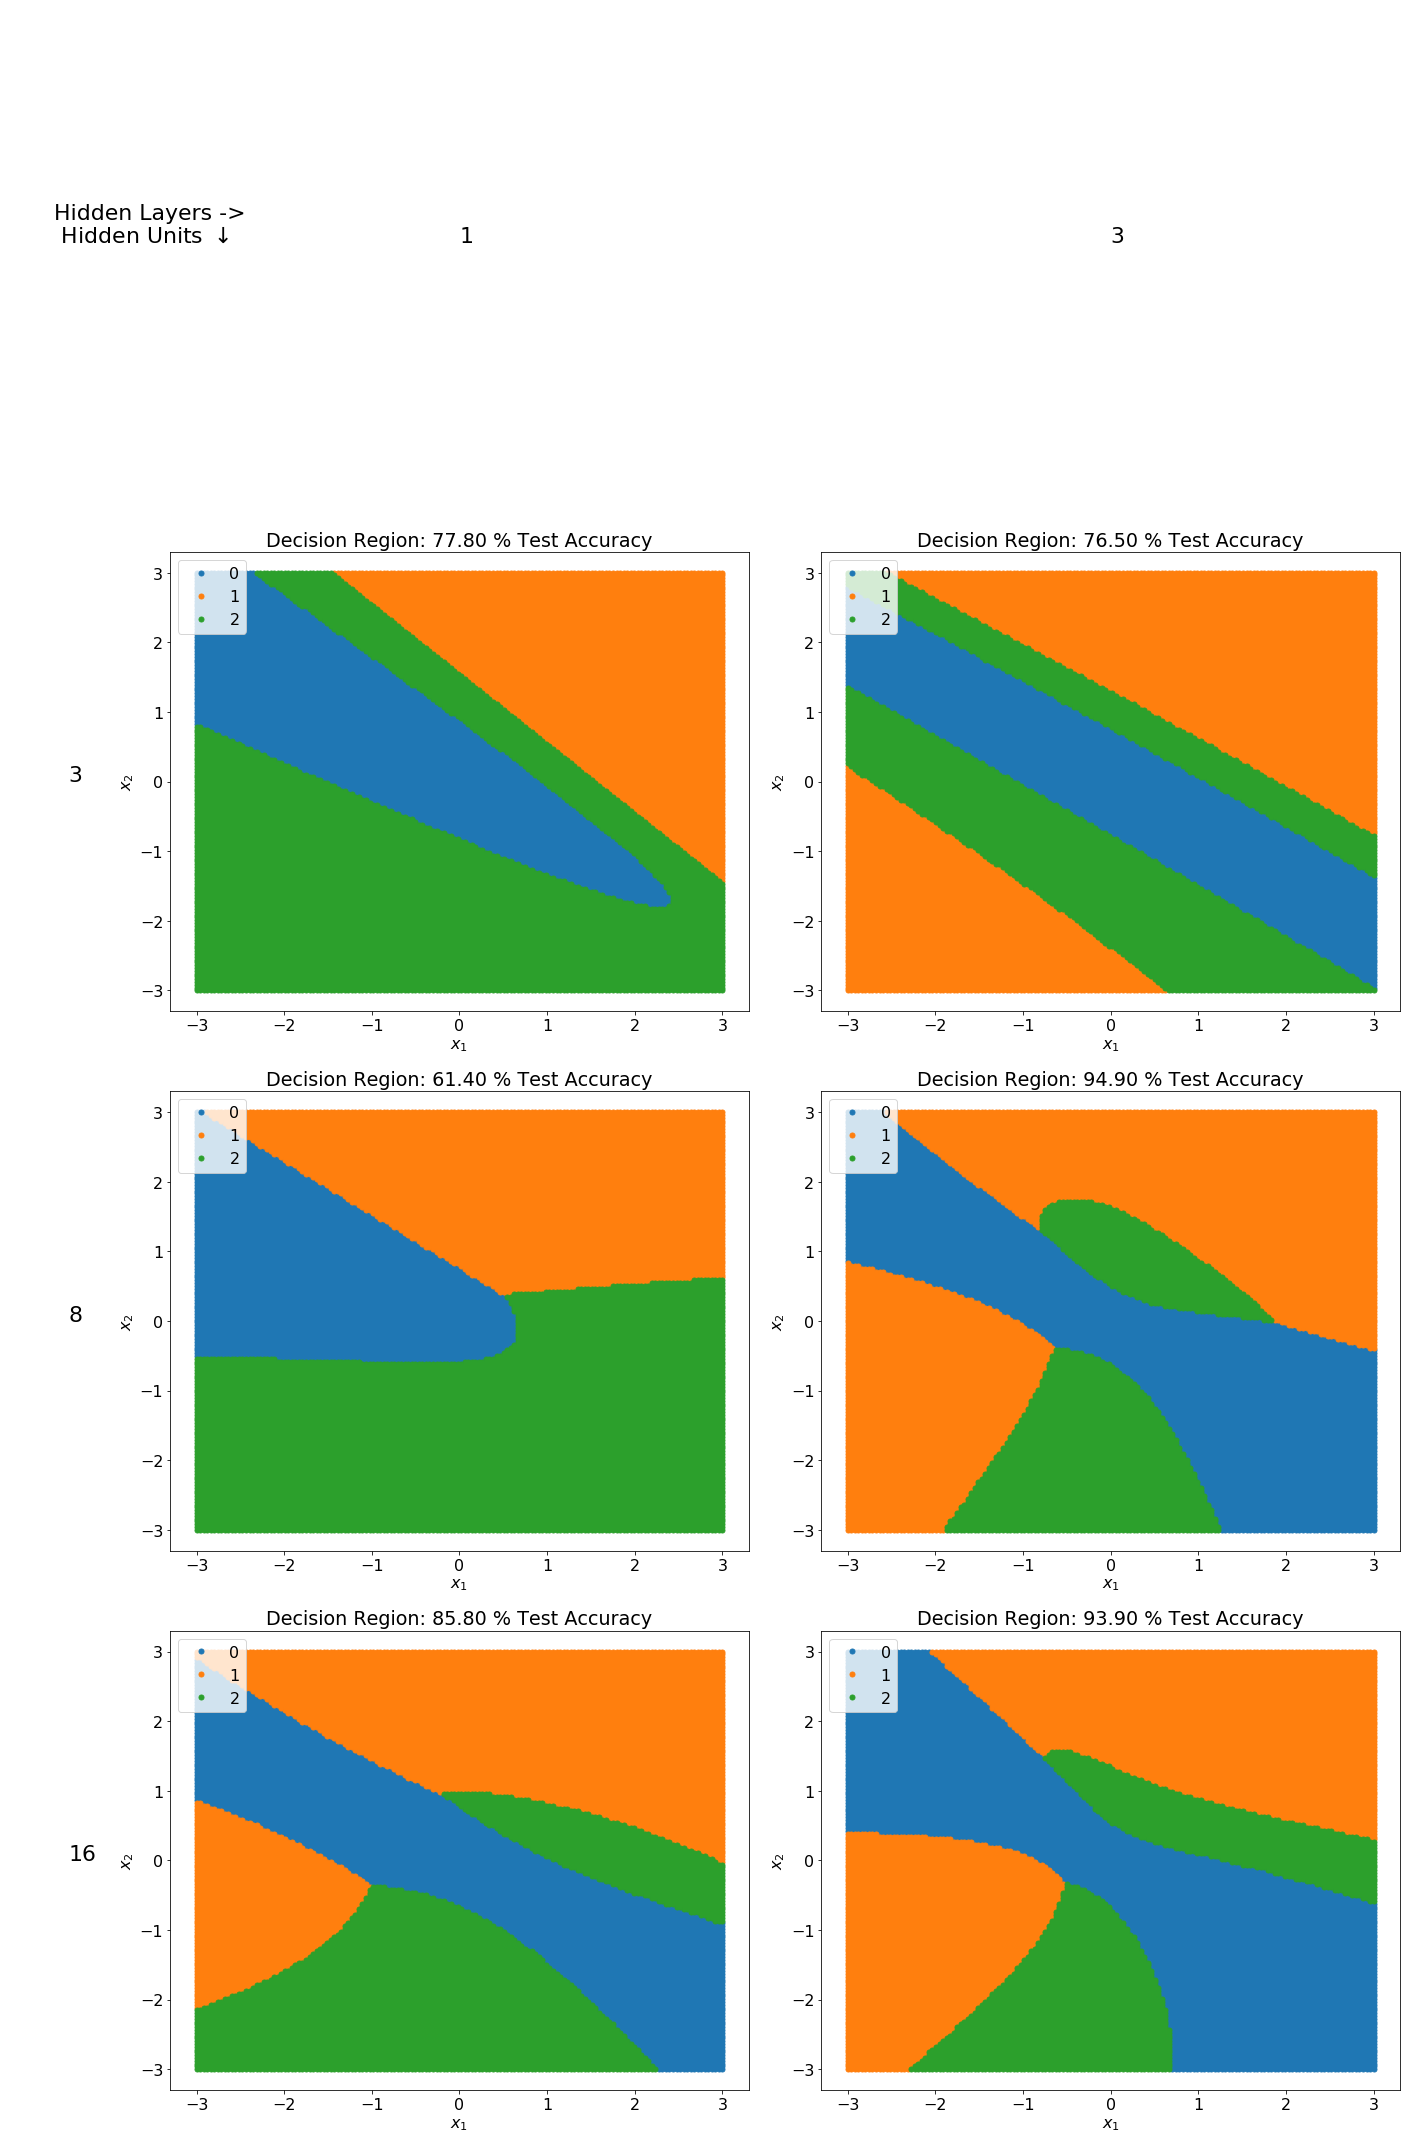

In [261]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.0001
act = "softplus"


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers, activation = act)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

### Alpha = 0.00001, Activation: Softplus

In [ ]:
num_features = 2
hidden_layers = [3, 8, 16]
num_classes = 3
hidden_units = [1, 3]
alpha = 0.00001
act = "softplus"


matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(len(hidden_layers) + 1, len(hidden_units) + 1, 
                       figsize=(20,30), 
                       gridspec_kw = {'width_ratios':[1, 10, 10]})
ax[0][0].text(0.25, 0.5, "Hidden Layers -> \n Hidden Units $\downarrow$",
              fontsize = 22)
ax[0][0].axis("off")
for j, layer_units in enumerate(hidden_layers):
    ax[j + 1][0].text(0.5, 0.5, str(layer_units), fontsize=22)
    ax[j + 1][0].axis("off")
    
for i, units in enumerate(hidden_units):
    ax[0][i + 1].text(0.5, 0.5, str(units), fontsize = 22)
    ax[0][i + 1].axis("off")
    
for i, units in enumerate(hidden_units):
    for j, layer_units in enumerate(hidden_layers):
        layers = [layer_units]*units
        net = Network((num_features, 1), num_classes, 
              hidden_layers = layers, activation = act)
        # net.model_print()
        net.train(data[:4000, ::], labels[:4000, :], 
                  data[-1000:, ::], labels[-1000:, ::],
                  alpha = alpha, epochs = 23, seed = 618)

        test_loss, test_acc = net.evaluate(data[-1000:, ::], labels[-1000:, ::])
        print("Test Loss:", test_loss)
        print("Test Accuracy:", test_acc)

        new_data = generate_data(-3, 3, 150)
        new_out = net.forward(new_data, do_train = False)
        new_labels = net.predict(new_out)

        plot_decision_boundary(ax[j + 1][i + 1], net, test_acc,
                               new_data, new_labels)
plt.tight_layout()
plt.show()

Training seed: 618
Test Loss: [871.60287123]
Test Accuracy: 70.4
Training seed: 618
Test Loss: [37016.40588813]
Test Accuracy: 58.7
Training seed: 618
Test Loss: [2.34856486e+10]
Test Accuracy: 82.6
Training seed: 618
